<a href="https://colab.research.google.com/github/Prithviraj2706/DataScience-Assignment/blob/main/DecisionTree_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
data=pd.read_csv('/content/Company_Data.csv')

In [ ]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


EDA

In [ ]:
data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [ ]:
data.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [ ]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

In [ ]:
data[['Urban','US','ShelveLoc']]=data[['Urban','US','ShelveLoc']].astype('category')

In [ ]:
#Label Encoding
data['Urban']=data['Urban'].cat.codes
data['US']=data['US'].cat.codes
data['ShelveLoc']=data['ShelveLoc'].cat.codes

In [ ]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


Our Y is Sales and its numerical data so we are taking its mean and the values less than mean will be taken as "bad" and values greater than mean will be taken as "good"

In [ ]:
data['Sales'].mean()

7.496325000000001

In [ ]:
#classifying numerical data accordingly
data['Sales.new'] = pd.cut(data['Sales'], bins=[-float('inf'), data['Sales'].mean(), float('inf')], labels=['Bad', 'Good'])
data['Sales.new']

0      Good
1      Good
2      Good
3       Bad
4       Bad
       ... 
395    Good
396     Bad
397     Bad
398     Bad
399    Good
Name: Sales.new, Length: 400, dtype: category
Categories (2, object): ['Bad' < 'Good']

In [ ]:
data=data.drop('Sales',axis=1)

In [ ]:
data=data.rename({'CompPrice':'CP','Advertising':'ADG','Population':'PN','ShelveLoc':'SL',},axis=1)
data

,CP,Income,ADG,PN,Price,SL,Age,Education,Urban,US,Sales.new
0,138,73,11,276,120,0,42,17,1,1,Good
1,111,48,16,260,83,1,65,10,1,1,Good
2,113,35,10,269,80,2,59,12,1,1,Good
3,117,100,4,466,97,2,55,14,1,1,Bad
4,141,64,3,340,128,0,38,13,1,0,Bad
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,Good
396,139,23,3,37,120,2,55,11,0,1,Bad
397,162,26,12,368,159,2,40,18,1,1,Bad
398,100,79,7,284,95,0,50,12,1,1,Bad


Visualisation

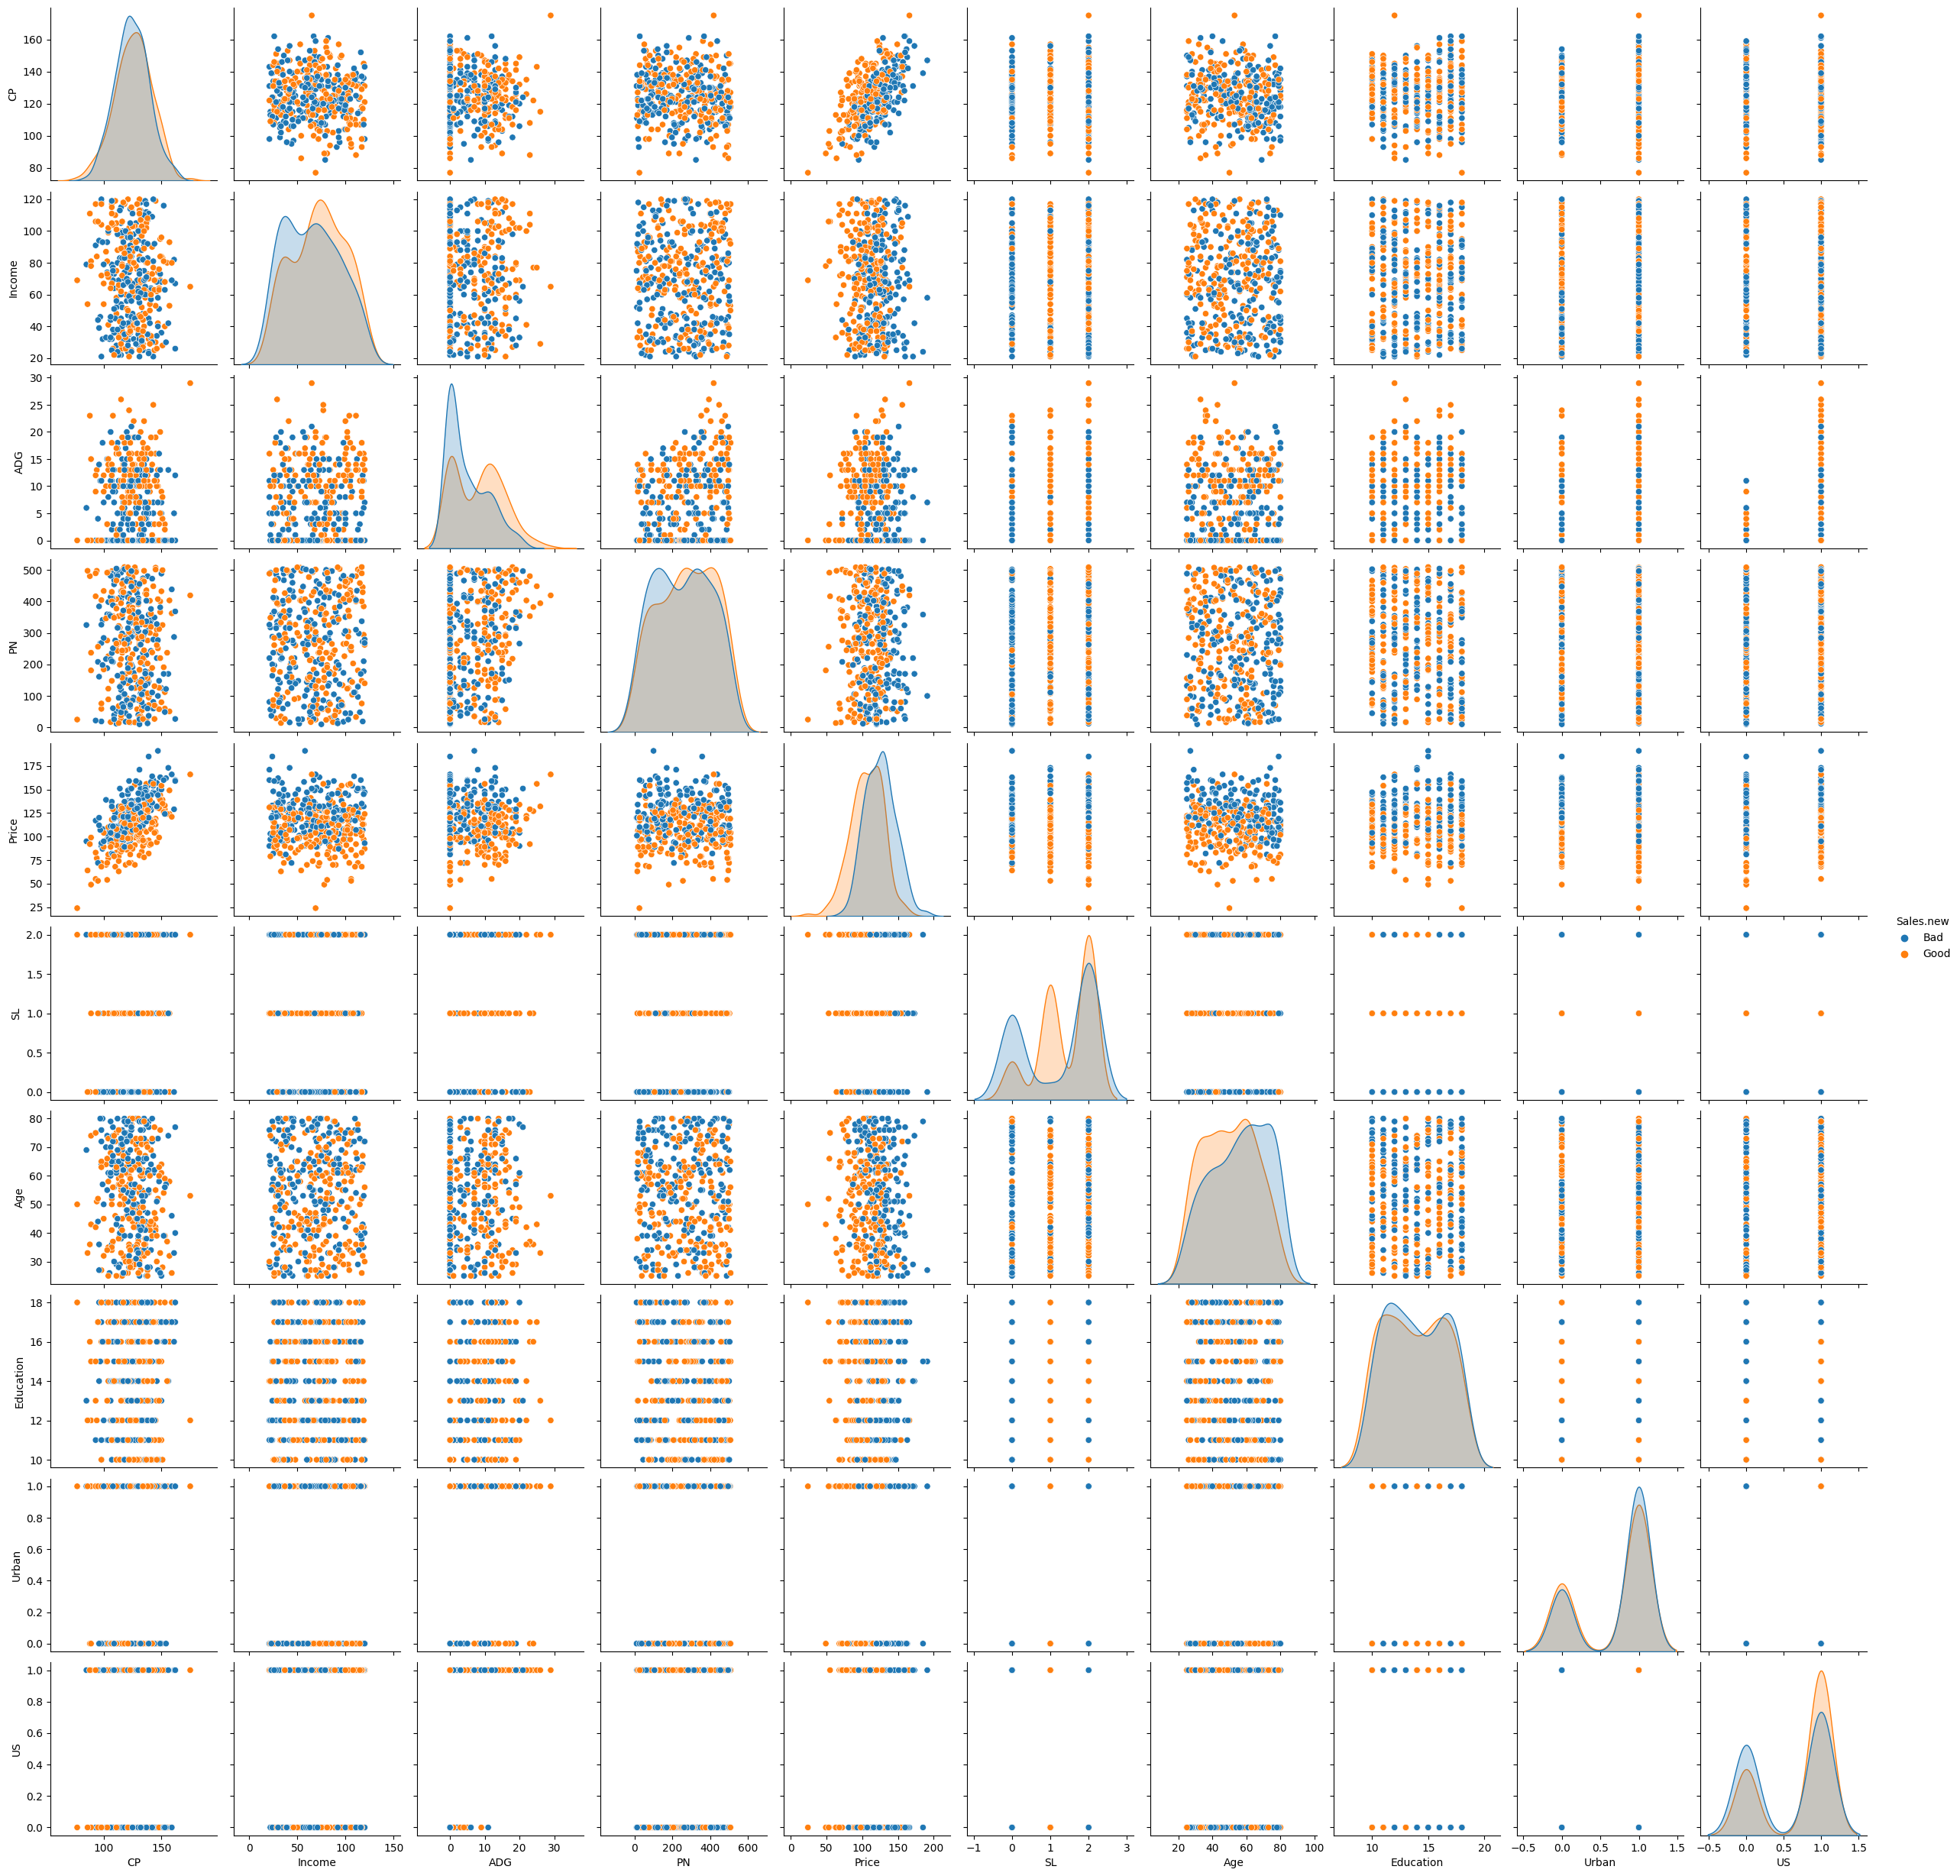

In [ ]:
sns.pairplot(data=data, hue = 'Sales.new')

array([[<Axes: title={'center': 'CP'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'ADG'}>],
       [<Axes: title={'center': 'PN'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'SL'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'Urban'}>],
       [<Axes: title={'center': 'US'}>, <Axes: >, <Axes: >]], dtype=object)

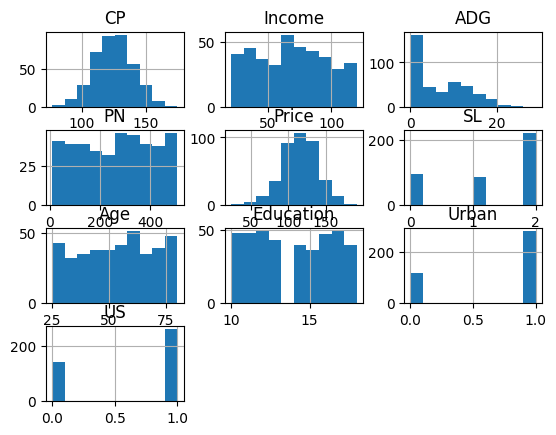

In [ ]:
data.hist()

<Axes: xlabel='CP', ylabel='Sales.new'>

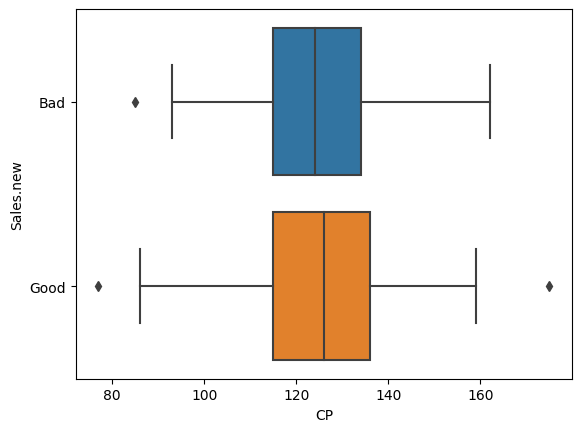

In [ ]:
sns.boxplot(data,x='CP',y='Sales.new')

<Axes: xlabel='Income', ylabel='Sales.new'>

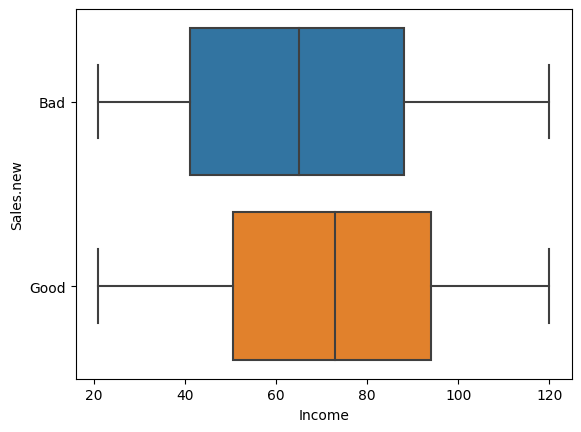

In [ ]:
sns.boxplot(data,x='Income',y='Sales.new')

<Axes: xlabel='ADG', ylabel='Sales.new'>

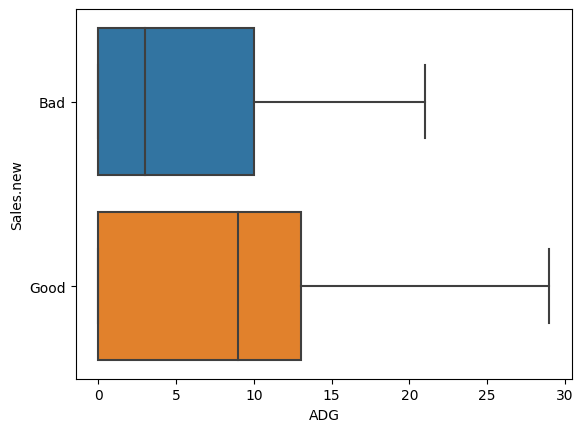

In [ ]:
sns.boxplot(data,x='ADG',y='Sales.new')

<Axes: xlabel='Age', ylabel='Sales.new'>

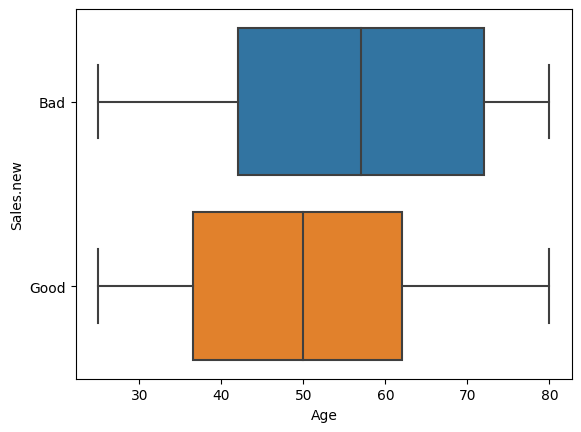

In [ ]:
sns.boxplot(data,x='Age',y='Sales.new')

<Axes: xlabel='Education', ylabel='Sales.new'>

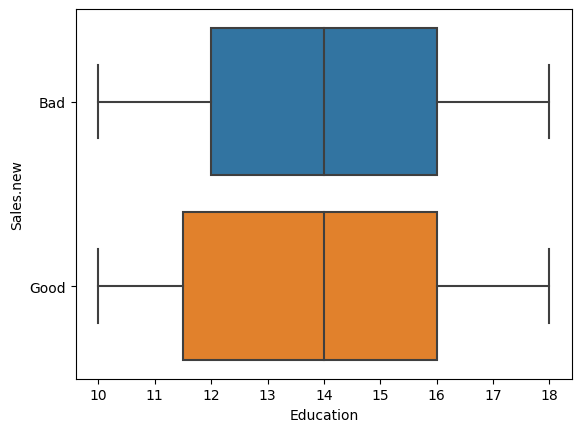

In [ ]:
sns.boxplot(data,x='Education',y='Sales.new')

<Axes: xlabel='Price', ylabel='Sales.new'>

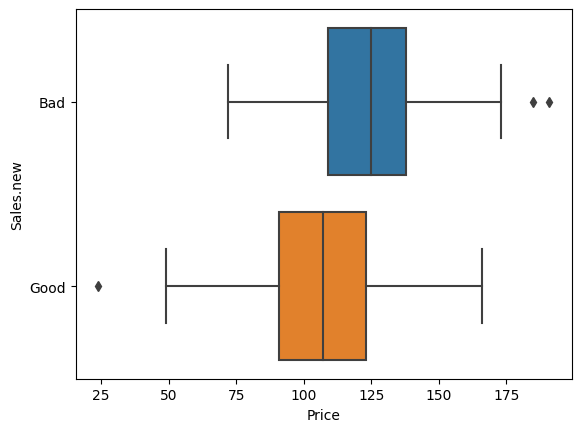

In [ ]:
sns.boxplot(data,x='Price',y='Sales.new')

<Axes: xlabel='SL', ylabel='Sales.new'>

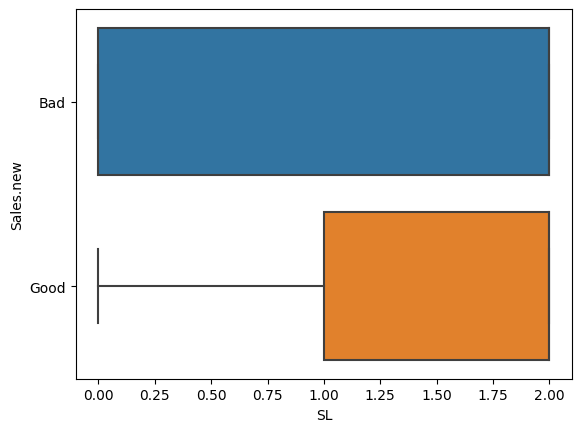

In [ ]:
sns.boxplot(data,x='SL',y='Sales.new')

<Axes: xlabel='Urban', ylabel='Sales.new'>

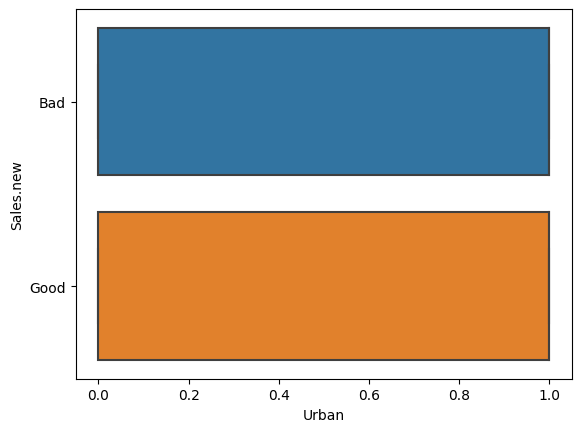

In [ ]:
sns.boxplot(data,x='Urban',y='Sales.new')

<Axes: xlabel='PN', ylabel='Sales.new'>

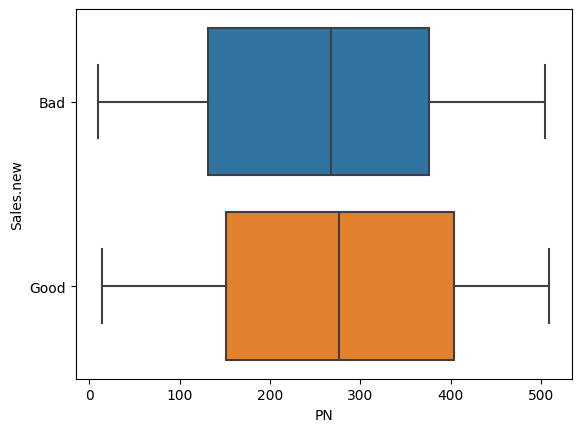

In [ ]:
sns.boxplot(data,x='PN',y='Sales.new')

In [ ]:
# Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [ ]:
# Normalized data frame (considering the numerical part of data)
data_norm = norm_func(data.iloc[:,0:10])
data_norm

,CP,Income,ADG,PN,Price,SL,Age,Education,Urban,US
0,0.622449,0.525253,0.379310,0.533066,0.574850,0.0,0.309091,0.875,1.0,1.0
1,0.346939,0.272727,0.551724,0.501002,0.353293,0.5,0.727273,0.000,1.0,1.0
2,0.367347,0.141414,0.344828,0.519038,0.335329,1.0,0.618182,0.250,1.0,1.0
3,0.408163,0.797980,0.137931,0.913828,0.437126,1.0,0.545455,0.500,1.0,1.0
4,0.653061,0.434343,0.103448,0.661323,0.622754,0.0,0.236364,0.375,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
395,0.622449,0.878788,0.586207,0.386774,0.622754,0.5,0.145455,0.500,1.0,1.0
396,0.632653,0.020202,0.103448,0.054108,0.574850,1.0,0.545455,0.125,0.0,1.0
397,0.867347,0.050505,0.413793,0.717435,0.808383,1.0,0.272727,1.000,1.0,1.0
398,0.234694,0.585859,0.241379,0.549098,0.425150,0.0,0.454545,0.250,1.0,1.0


In [ ]:
X=data_norm
Y=data['Sales.new']
Y

0      Good
1      Good
2      Good
3       Bad
4       Bad
       ... 
395    Good
396     Bad
397     Bad
398     Bad
399    Good
Name: Sales.new, Length: 400, dtype: category
Categories (2, object): ['Bad' < 'Good']

Model Building Using Entropy criteria

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=42)
treemodel1=DecisionTreeClassifier(criterion = 'entropy',max_depth=3)

In [ ]:
treemodel1.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.5, 0.875, 'x[4] <= 0.422\nentropy = 0.997\nsamples = 268\nvalue = [142, 126]'),
 Text(0.25, 0.625, 'x[5] <= 0.25\nentropy = 0.527\nsamples = 42\nvalue = [5, 37]'),
 Text(0.125, 0.375, 'x[0] <= 0.423\nentropy = 0.946\nsamples = 11\nvalue = [4, 7]'),
 Text(0.0625, 0.125, 'entropy = 0.985\nsamples = 7\nvalue = [4, 3]'),
 Text(0.1875, 0.125, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.375, 0.375, 'x[1] <= 0.985\nentropy = 0.206\nsamples = 31\nvalue = [1, 30]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 29\nvalue = [0, 29]'),
 Text(0.4375, 0.125, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.75, 0.625, 'x[5] <= 0.25\nentropy = 0.967\nsamples = 226\nvalue = [137, 89]'),
 Text(0.625, 0.375, 'x[4] <= 0.47\nentropy = 0.598\nsamples = 55\nvalue = [47, 8]'),
 Text(0.5625, 0.125, 'entropy = 0.98\nsamples = 12\nvalue = [7, 5]'),
 Text(0.6875, 0.125, 'entropy = 0.365\nsamples = 43\nvalue = [40, 3]'),
 Text(0.875, 0.375, 'x[5] <= 0.75\nentropy = 0.998\nsamples = 171\n

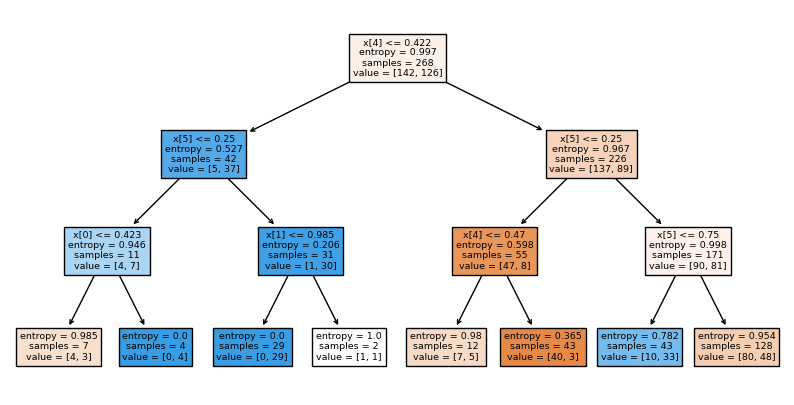

In [ ]:
plt.figure(figsize=(10,5))
tree.plot_tree(treemodel1,filled=True)

In [ ]:
Y_pred1=treemodel1.predict(X_test)
Y_pred1

array(['Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Good',
       'Good', 'Bad', 'Bad', 'Good', 'Bad', 'Good', 'Good', 'Good',
       'Good', 'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad',
       'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Good', 'Bad', 'Bad', 'Good',
       'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Bad', 'Good', 'Good',
       'Good', 'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Good', 'Bad', 'Bad',
       'Good', 'Bad', 'Bad', 'Bad', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Good',
       'Bad', 'Bad', 'Good', 'Bad', 'Good', 'Good', 'Bad', 'Bad', 'Bad',
       'Bad', 'Bad', 'Good', 'Bad', 'Good', 'Bad', 'Bad', 'Bad', 'Good',
       'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Bad',
       'Good', 'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Good', 'Bad', 'Good',
       'Bad', 'Bad', 'Good', 'Bad', 'Good', 'Bad', 'Good', 'Bad', 'Bad',
       'Bad', 'Good', 'Bad', 'Bad', 'Good', 'Good', 'Good', 'G

In [ ]:
score=accuracy_score(Y_pred1,Y_test)
print("The accuracy is",np.round(score*100,2),"%")

The accuracy is 70.45 %


In [ ]:
print(classification_report(Y_pred1,Y_test))

              precision    recall  f1-score   support

         Bad       0.86      0.62      0.72        82
        Good       0.58      0.84      0.68        50

    accuracy                           0.70       132
   macro avg       0.72      0.73      0.70       132
weighted avg       0.75      0.70      0.71       132



Building Model using gini criteria

In [ ]:
treemodel2=DecisionTreeClassifier(criterion='gini',max_depth=3)

In [ ]:
treemodel2.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'x[4] <= 0.488\ngini = 0.498\nsamples = 268\nvalue = [142, 126]'),
 Text(0.25, 0.625, 'x[6] <= 0.791\ngini = 0.384\nsamples = 81\nvalue = [21, 60]'),
 Text(0.125, 0.375, 'x[5] <= 0.25\ngini = 0.245\nsamples = 63\nvalue = [9, 54]'),
 Text(0.0625, 0.125, 'gini = 0.444\nsamples = 18\nvalue = [6, 12]'),
 Text(0.1875, 0.125, 'gini = 0.124\nsamples = 45\nvalue = [3, 42]'),
 Text(0.375, 0.375, 'x[4] <= 0.335\ngini = 0.444\nsamples = 18\nvalue = [12, 6]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.4375, 0.125, 'gini = 0.32\nsamples = 15\nvalue = [12, 3]'),
 Text(0.75, 0.625, 'x[5] <= 0.25\ngini = 0.457\nsamples = 187\nvalue = [121, 66]'),
 Text(0.625, 0.375, 'x[0] <= 0.755\ngini = 0.133\nsamples = 42\nvalue = [39, 3]'),
 Text(0.5625, 0.125, 'gini = 0.05\nsamples = 39\nvalue = [38, 1]'),
 Text(0.6875, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.875, 0.375, 'x[5] <= 0.75\ngini = 0.491\nsamples = 145\nvalue = [82, 63]'),
 Text(0.81

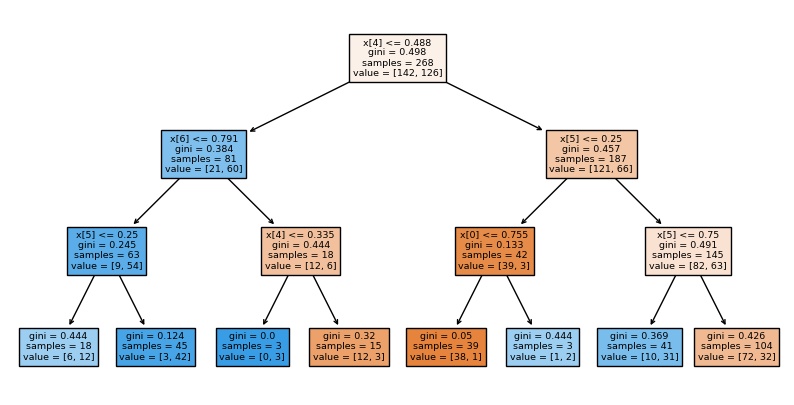

In [ ]:
#Decision Tree
plt.figure(figsize=(10,5))
tree.plot_tree(treemodel2,filled=True)

In [ ]:
Y_pred2=treemodel2.predict(X_test)
Y_pred2

array(['Bad', 'Bad', 'Good', 'Bad', 'Good', 'Bad', 'Good', 'Good', 'Good',
       'Good', 'Bad', 'Good', 'Good', 'Bad', 'Good', 'Good', 'Good',
       'Good', 'Bad', 'Bad', 'Good', 'Bad', 'Good', 'Bad', 'Bad', 'Bad',
       'Bad', 'Good', 'Bad', 'Bad', 'Good', 'Good', 'Bad', 'Bad', 'Good',
       'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Bad', 'Good', 'Good',
       'Good', 'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Good', 'Good', 'Good',
       'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Good', 'Bad', 'Good', 'Bad',
       'Bad', 'Good', 'Bad', 'Good', 'Bad', 'Good', 'Bad', 'Bad', 'Bad',
       'Good', 'Good', 'Bad', 'Good', 'Bad', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Good', 'Bad',
       'Good', 'Bad', 'Good', 'Bad', 'Bad', 'Good', 'Good', 'Bad', 'Good',
       'Bad', 'Bad', 'Good', 'Good', 'Bad', 'Bad', 'Good', 'Bad', 'Bad',
       'Bad', 'Good', 'Bad', 'Bad', 'Good', 'Good

In [ ]:
score=accuracy_score(Y_pred2,Y_test)
print("Accuracy score is",np.round(score*100,2),"%")   #gini gives more accuracy

Accuracy score is 71.21 %


In [ ]:
print(classification_report(Y_pred2,Y_test))

              precision    recall  f1-score   support

         Bad       0.75      0.66      0.70        67
        Good       0.68      0.77      0.72        65

    accuracy                           0.71       132
   macro avg       0.72      0.71      0.71       132
weighted avg       0.72      0.71      0.71       132

